In [20]:


# image = cv2.imread('D:/localhome/nla/Desktop/t/TEST/NO/No13.jpg')
# original = image.copy()
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# cnts = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# for c in cnts:
#     (x, y, w, h) = cv2.boundingRect(c)
#     ROI = original[y:y+h, x:x+w].copy()
#     cv2.rectangle(original, (x, y), (x + w, y + h), (36,255,12), 2)

# cv2.imshow('ROI', ROI)
# cv2.imwrite('D:/localhome/nla/Desktop/t/TEST/NO/No13_processed.jpg', ROI)
# cv2.waitKey()

In [6]:
IMG_SIZE = (224,224)
import imutils
import matplotlib.pyplot as plt
import cv2


img = cv2.imread('D:/localhome/nla/Desktop/t/TEST/NO/No13.jpg')
img = cv2.resize(
            img,
            dsize=IMG_SIZE,
            interpolation=cv2.INTER_CUBIC
        )
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

# find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# find the extreme points
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# add contour on the image
img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

# add extreme points
img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

# crop
ADD_PIXELS = 0
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

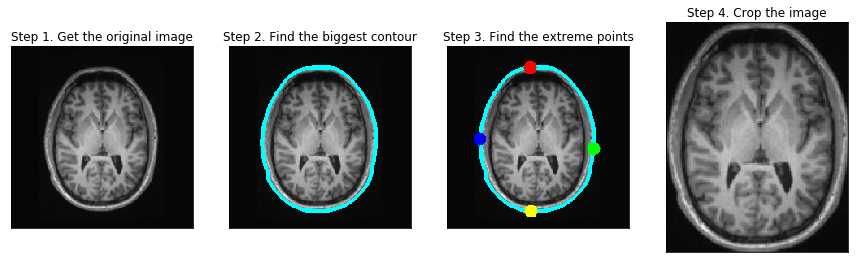

In [7]:
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Get the original image')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the image')
plt.show()

In [29]:
import os
import imutils
import matplotlib.pyplot as plt

    
def crop_img(root, file):
    print(os.path.join(root, file))
    
    dst_path= root+"/PROCESSED/"
    IMG_SIZE = (224,224)
        #img = cv2.imread('D:/localhome/nla/Desktop/t/TEST/NO/No13.jpg')
    img=cv2.imread(os.path.join(root, file))
    img = cv2.resize(img,dsize=IMG_SIZE,interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    # find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    # add contour on the image
    img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

    # add extreme points
    img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
    img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
    img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
    img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

    # crop
    ADD_PIXELS = 0
    new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
    
    print(os.path.join(dst_path, file))
    cv2.imwrite(os.path.join(dst_path, file), new_img)
    
def load_files(folderpath):
    
    for root, dirs, files in os.walk(os.path.abspath(folderpath)):
        os.mkdir(root+"/PROCESSED/")
        for file in files:
            
            crop_img(root, file)

            
load_files("D:/localhome/nla/Desktop/t/TEST/NO/")
load_files("D:/localhome/nla/Desktop/t/TEST/YES/")
load_files("D:/localhome/nla/Desktop/t/TRAIN/NO/")
load_files("D:/localhome/nla/Desktop/t/TRAIN/YES/")
load_files("D:/localhome/nla/Desktop/t/VAL/NO/")
load_files("D:/localhome/nla/Desktop/t/VAL/YES/")

D:\localhome\nla\Desktop\t\TEST\NO\No13.jpg
D:\localhome\nla\Desktop\t\TEST\NO/PROCESSED/No13.jpg
D:\localhome\nla\Desktop\t\TEST\NO\No13_processed.jpg
D:\localhome\nla\Desktop\t\TEST\NO/PROCESSED/No13_processed.jpg
D:\localhome\nla\Desktop\t\TEST\NO\No14.jpg
D:\localhome\nla\Desktop\t\TEST\NO/PROCESSED/No14.jpg
D:\localhome\nla\Desktop\t\TEST\NO\No15.jpg
D:\localhome\nla\Desktop\t\TEST\NO/PROCESSED/No15.jpg
D:\localhome\nla\Desktop\t\TEST\NO\No16.jpg
D:\localhome\nla\Desktop\t\TEST\NO/PROCESSED/No16.jpg
D:\localhome\nla\Desktop\t\TEST\NO\No17.jpg
D:\localhome\nla\Desktop\t\TEST\NO/PROCESSED/No17.jpg
D:\localhome\nla\Desktop\t\TEST\NO\No18.jpg
D:\localhome\nla\Desktop\t\TEST\NO/PROCESSED/No18.jpg
D:\localhome\nla\Desktop\t\TEST\NO\No19.jpg
D:\localhome\nla\Desktop\t\TEST\NO/PROCESSED/No19.jpg
D:\localhome\nla\Desktop\t\TEST\NO\No20.jpg
D:\localhome\nla\Desktop\t\TEST\NO/PROCESSED/No20.jpg
D:\localhome\nla\Desktop\t\TEST\NO\No21.jpg
D:\localhome\nla\Desktop\t\TEST\NO/PROCESSED/No21.jpg


D:\localhome\nla\Desktop\t\TRAIN\NO/PROCESSED/no 1.jpg
D:\localhome\nla\Desktop\t\TRAIN\NO\no 10.jpg
D:\localhome\nla\Desktop\t\TRAIN\NO/PROCESSED/no 10.jpg
D:\localhome\nla\Desktop\t\TRAIN\NO\no 2.jpg
D:\localhome\nla\Desktop\t\TRAIN\NO/PROCESSED/no 2.jpg
D:\localhome\nla\Desktop\t\TRAIN\NO\no 3.jpg
D:\localhome\nla\Desktop\t\TRAIN\NO/PROCESSED/no 3.jpg
D:\localhome\nla\Desktop\t\TRAIN\NO\no 4.jpg
D:\localhome\nla\Desktop\t\TRAIN\NO/PROCESSED/no 4.jpg
D:\localhome\nla\Desktop\t\TRAIN\NO\no 5.jpeg
D:\localhome\nla\Desktop\t\TRAIN\NO/PROCESSED/no 5.jpeg
D:\localhome\nla\Desktop\t\TRAIN\NO\no 6.jpg
D:\localhome\nla\Desktop\t\TRAIN\NO/PROCESSED/no 6.jpg
D:\localhome\nla\Desktop\t\TRAIN\NO\no 7.jpeg
D:\localhome\nla\Desktop\t\TRAIN\NO/PROCESSED/no 7.jpeg
D:\localhome\nla\Desktop\t\TRAIN\NO\no 8.jpg
D:\localhome\nla\Desktop\t\TRAIN\NO/PROCESSED/no 8.jpg
D:\localhome\nla\Desktop\t\TRAIN\NO\no 89.jpg
D:\localhome\nla\Desktop\t\TRAIN\NO/PROCESSED/no 89.jpg
D:\localhome\nla\Desktop\t\TRAIN\NO\n

D:\localhome\nla\Desktop\t\TRAIN\YES/PROCESSED/Y42.jpg
D:\localhome\nla\Desktop\t\TRAIN\YES\Y44.JPG
D:\localhome\nla\Desktop\t\TRAIN\YES/PROCESSED/Y44.JPG
D:\localhome\nla\Desktop\t\TRAIN\YES\Y45.JPG
D:\localhome\nla\Desktop\t\TRAIN\YES/PROCESSED/Y45.JPG
D:\localhome\nla\Desktop\t\TRAIN\YES\Y46.jpg
D:\localhome\nla\Desktop\t\TRAIN\YES/PROCESSED/Y46.jpg
D:\localhome\nla\Desktop\t\TRAIN\YES\Y47.JPG
D:\localhome\nla\Desktop\t\TRAIN\YES/PROCESSED/Y47.JPG
D:\localhome\nla\Desktop\t\TRAIN\YES\Y49.JPG
D:\localhome\nla\Desktop\t\TRAIN\YES/PROCESSED/Y49.JPG
D:\localhome\nla\Desktop\t\TRAIN\YES\Y50.JPG
D:\localhome\nla\Desktop\t\TRAIN\YES/PROCESSED/Y50.JPG
D:\localhome\nla\Desktop\t\TRAIN\YES\Y51.jpg
D:\localhome\nla\Desktop\t\TRAIN\YES/PROCESSED/Y51.jpg
D:\localhome\nla\Desktop\t\TRAIN\YES\Y52.jpg
D:\localhome\nla\Desktop\t\TRAIN\YES/PROCESSED/Y52.jpg
D:\localhome\nla\Desktop\t\TRAIN\YES\Y53.jpg
D:\localhome\nla\Desktop\t\TRAIN\YES/PROCESSED/Y53.jpg
D:\localhome\nla\Desktop\t\TRAIN\YES\Y54.jpg
